### 基于搜索的方法：以城市搜索为例

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
#我们希望把上面代码转换成如下格式
city_location = {
    '香港':(114.17, 22.28)
}

In [4]:
#先以一个坐标为例子
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]},"

In [3]:
import re

In [6]:
#用正则表达式把信息提取出来
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [7]:
pattern.findall(test_string)

[('兰州', '103.73', '36.03')]

In [12]:
#把城市信息解码成便于查找的格式
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    city, long, lat = city_info[0]
    long, lat = float(long), float(lat)
    city_location[city] = (long,lat)

In [13]:
city_location

{'香港': (114.17, 22.28),
 '兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '澳门': (113.54, 22.19)}

In [14]:
#计算每一个城市之间的距离
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.
    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)
    Returns
    -------
    distance_in_km : float
    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [15]:
get_geo_distance('上海','杭州')

153.5185697155768

In [16]:
#导入作图工具，把城市间的关系绘制成图形
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_location.keys()))

In [19]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

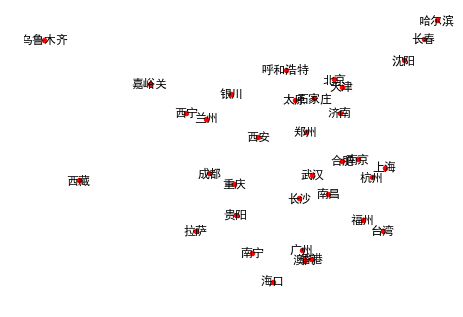

In [20]:
nx.draw(city_graph,city_location,with_labels=True,node_size=20)

In [27]:
#我们再观察城市与城市之间的关系
from collections import defaultdict

threshold = 300
cities = list(city_location.keys())
cities_connection = defaultdict(list)

In [28]:
cities_connection

defaultdict(list, {})

In [29]:
#如果两个城市间的距离小于门槛值，则添加联系
for c1 in cities:
    for c2 in cities:
        if c1==c2: continue
        if get_geo_distance(c1,c2)<threshold:
            cities_connection[c1].append(c2)

In [46]:
cities_connection

defaultdict(list,
            {'香港': ['广州', '长沙', '澳门'],
             '兰州': ['西宁', '成都', '银川'],
             '西宁': ['兰州', '成都', '拉萨'],
             '成都': ['兰州', '西宁', '拉萨', '重庆'],
             '石家庄': ['郑州', '济南', '太原', '北京'],
             '拉萨': ['西宁', '成都'],
             '贵阳': ['重庆', '南宁'],
             '武汉': ['郑州', '南昌', '长沙'],
             '郑州': ['石家庄', '武汉', '长沙', '太原'],
             '济南': ['石家庄', '合肥', '北京', '天津'],
             '南京': ['合肥', '杭州'],
             '合肥': ['济南', '南京', '南昌'],
             '杭州': ['南京', '福州', '上海'],
             '南昌': ['武汉', '合肥'],
             '福州': ['杭州', '台湾'],
             '广州': ['香港', '长沙', '澳门'],
             '长沙': ['香港', '武汉', '郑州', '广州', '澳门'],
             '海口': ['南宁'],
             '沈阳': ['长春'],
             '长春': ['沈阳', '哈尔滨'],
             '哈尔滨': ['长春'],
             '太原': ['石家庄', '郑州', '呼和浩特'],
             '台湾': ['福州'],
             '北京': ['石家庄', '济南', '天津'],
             '上海': ['杭州'],
             '重庆': ['成都', '贵阳', '银川'],
             '天津': 

In [30]:
cities_connection['兰州']

['西宁', '成都', '银川']

In [31]:
cities_connection_graph = nx.Graph(cities_connection)

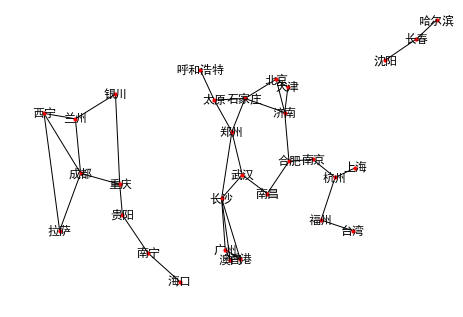

In [32]:
nx.draw(cities_connection_graph, city_location, with_labels=True,node_size=10)

### 假设我们以一个城市作为起点，另一个作为终点，如何选择一条路径呢？

In [34]:
#以如下信息为例：
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [35]:
simple_connection_info = defaultdict(list)
simple_connection_info.update(simple_connection_info_src)

In [36]:
simple_connection_info

defaultdict(list,
            {'北京': ['太原', '沈阳'],
             '太原': ['北京', '西安', '郑州'],
             '兰州': ['西安'],
             '郑州': ['太原'],
             '西安': ['兰州', '长沙'],
             '长沙': ['福州', '南宁'],
             '沈阳': ['北京']})

In [40]:
#我们定义一个搜索方法
def search(start,stop,connection_graph,sort_candidate):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop()
        frontier = path[-1]
        if frontier in visited: continue
        successors = connection_graph[frontier]
        for city in successors:
            if city in path: continue
            new_path = path + [city]
            pathes.append(new_path)
            if city == stop: return new_path
        visited.add(frontier)
        pathes = sort_candidate(pathes)

In [91]:
#最长路径
def transfer_stations_first(pathes):
    return sorted(pathes,key=len)

In [90]:
#最短路径
def transfer_as_less(pathes):
    return sorted(pathes,key=len,reverse=True)

In [47]:
search('北京', '广州', cities_connection, sort_candidate=transfer_stations_first)

['北京', '天津', '济南', '合肥', '南昌', '武汉', '长沙', '广州']

In [48]:
search('北京', '广州', cities_connection, sort_candidate=transfer_as_much)

['北京', '石家庄', '郑州', '长沙', '广州']

In [51]:
from emoji import emojize

In [87]:
def pretty_print(cities):
    print(emojize(" :airplane_departure:-> ").join(cities)+ emojize(":airplane_arrival:"))

In [88]:
pretty_print(search('北京', '广州', cities_connection, sort_candidate=transfer_as_much))

北京 🛫-> 石家庄 🛫-> 郑州 🛫-> 长沙 🛫-> 广州🛬


In [89]:
pretty_print(search('北京', '广州', cities_connection, sort_candidate=transfer_stations_first))

北京 🛫-> 天津 🛫-> 济南 🛫-> 合肥 🛫-> 南昌 🛫-> 武汉 🛫-> 长沙 🛫-> 广州🛬


### 爬虫初步

In [92]:
import requests

In [98]:
#链接
url = "https://movie.douban.com/subject/26849758/?tag=%E7%83%AD%E9%97%A8&from=gaia_video"
#获取链接的相关信息，传入response中
response = requests.get(url)

In [99]:
#用正则爬取我们想要的信息
_next = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '

In [101]:
#封装正则表达式
pattern = re.compile(_next)
likes = pattern.findall(response.text)

In [102]:
for like in likes:
    print(like)

movie.douban.com/subject/26883064/?from=subject-page
movie.douban.com/subject/2210001/?from=subject-page
movie.douban.com/subject/26776350/?from=subject-page
movie.douban.com/subject/26930540/?from=subject-page
movie.douban.com/subject/25994712/?from=subject-page
movie.douban.com/subject/26605881/?from=subject-page
movie.douban.com/subject/27140017/?from=subject-page
movie.douban.com/subject/1441794/?from=subject-page
movie.douban.com/subject/30446788/?from=subject-page
movie.douban.com/subject/24695611/?from=subject-page


## 机器学习的引入

In [103]:
#导入波士顿房价数据集
from sklearn.datasets import load_boston

In [104]:
data = load_boston()

In [110]:
#X是特征，y是目标房价
X,y = data['data'], data['target']

In [116]:
X.shape

(506, 13)

In [113]:
len(y)

506

In [114]:
len(X)

506

In [117]:
#画出第五个特征（房间数量）和房价的关系
def draw_rm_price():
    plt.scatter(X[:,5],y)

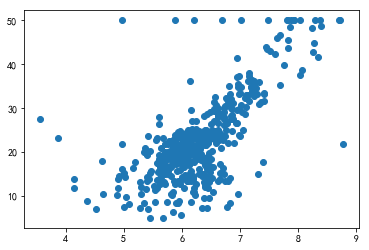

In [118]:
draw_rm_price()

In [119]:
import random
#假设房间数量和目标房价存在线性关系，一元一次函数
def price(rm,k,b):
    return k * rm + b

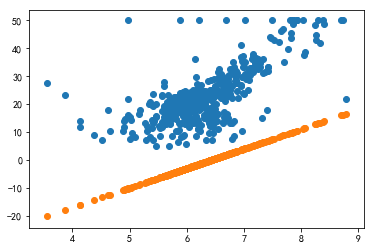

In [129]:
X_rm = X[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random = [price(r,k,b) for r in X_rm]

draw_rm_price()
plt.scatter(X_rm,price_by_random)

In [130]:
#为了衡量拟合程度的好坏，这里引入loss函数
#loss即是真实值和预测值之间的差，loss越小，拟合程度越好
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

In [131]:
#随机去寻找某个k,b能够让loss越来越小
trying_times = 2000
#初始化损失（无限大），k值，b值
min_loss = float('inf')
best_k,best_b = None,None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random = [price(r,k,b) for r in X_rm]
    
    current_loss = loss(y,price_by_random)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_b, best_k = b,k
        print('When time is : {}, get best_k: {} best_b {}, and the loss is : {}'
              .format(i,best_k,best_b,min_loss))

When time is : 0, get best_k: 22.43127802955378 best_b -9.19258907150737, and the loss is : 12066.040028089055
When time is : 1, get best_k: 1.1333026893000806 best_b 22.182406905363152, and the loss is : 120.74751894201785
When time is : 27, get best_k: 0.7400430667568543 best_b 13.99841519207908, and the loss is : 93.13334672675224
When time is : 129, get best_k: 10.414624025968038 best_b -41.70300940102987, and the loss is : 45.92867358318739
When time is : 1096, get best_k: 8.879393130826045 best_b -31.98905823683529, and the loss is : 45.26819373729531


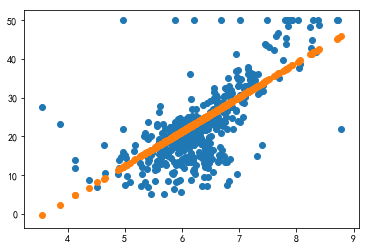

In [133]:
X_rm = X[:, 5]
k = 8.879393130826045
b = -31.98905823683529
price_by_random = [price(r, k, b) for r in X_rm]

draw_rm_price()
plt.scatter(X_rm, price_by_random)

In [135]:
#用方向来决定k,b的取值，而不是随机
trying_times = 2000
#初始化损失（无限大），k值，b值
min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]
#随机选择方向
next_direction = random.choice(direction)
#确定步长
scalar = 0.1

for i in range(trying_times):
    k_direction,b_direction = next_direction
    current_k,current_b = best_k + k_direction*scalar, best_b + b_direction*scalar

    price_by_random = [price(r,current_k,current_b) for r in X_rm]
    
    current_loss = loss(y,price_by_random)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_b, best_k = current_b,current_k
        print('When time is : {}, get best_k: {} best_b {}, and the loss is : {}'
              .format(i,best_k,best_b,min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: 79.84942418541601 best_b -74.05034077886043, and the loss is : 166730.13315350047
When time is : 2, get best_k: 79.74942418541602 best_b -74.15034077886042, and the loss is : 166133.29043950446
When time is : 3, get best_k: 79.64942418541602 best_b -74.25034077886042, and the loss is : 165537.518897376
When time is : 4, get best_k: 79.54942418541603 best_b -74.35034077886041, and the loss is : 164942.81852711504
When time is : 5, get best_k: 79.44942418541604 best_b -74.45034077886041, and the loss is : 164349.18932872178
When time is : 6, get best_k: 79.34942418541604 best_b -74.5503407788604, and the loss is : 163756.6313021956
When time is : 7, get best_k: 79.24942418541605 best_b -74.6503407788604, and the loss is : 163165.1444475372
When time is : 8, get best_k: 79.14942418541605 best_b -74.75034077886039, and the loss is : 162574.72876474605
When time is : 9, get best_k: 79.04942418541606 best_b -74.85034077886039, and the loss is : 161985.3842538226

When time is : 428, get best_k: 37.14942418541653 best_b -116.750340778858, and the loss is : 9302.44679554347
When time is : 429, get best_k: 37.04942418541653 best_b -116.850340778858, and the loss is : 9162.994468957371
When time is : 430, get best_k: 36.949424185416525 best_b -116.95034077885799, and the loss is : 9024.613314238777
When time is : 431, get best_k: 36.849424185416524 best_b -117.05034077885799, and the loss is : 8887.303331387628
When time is : 432, get best_k: 36.74942418541652 best_b -117.15034077885798, and the loss is : 8751.064520403965
When time is : 433, get best_k: 36.64942418541652 best_b -117.25034077885798, and the loss is : 8615.89688128777
When time is : 434, get best_k: 36.54942418541652 best_b -117.35034077885797, and the loss is : 8481.80041403904
When time is : 435, get best_k: 36.44942418541652 best_b -117.45034077885796, and the loss is : 8348.775118657793
When time is : 436, get best_k: 36.34942418541652 best_b -117.55034077885796, and the loss is